## Grupo
227124 Jorge Henrique Monteiro dos Santos

262251 Vitor Mello de Araujo Lima

## Objetivo

Fazer a busca dos melhores hiperpârametros para uma SVM para Regressão num banco de dados em particular.

X.npy são os dados de entrada, e y.npy são os valores de saída correspondentes.

Os seguintes algoritmos de otimização serão utilizados durante a execução dessa tarefa:

- Random search
- Grid search
- Bayesian optimization
- PSO
- Simulated Annealling
- CMA-ES


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import random
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
from sklearn import  datasets
from sklearn.pipeline import  Pipeline
from sklearn.utils.fixes import loguniform
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [3]:
!pip install --upgrade pyswarm
from pyswarm import pso

Requirement already up-to-date: pyswarm in /home/vitor/anaconda3/lib/python3.8/site-packages (0.6)


## Importando conjunto de dados

In [4]:
#x_url = "https://www.ic.unicamp.br/~wainer/cursos/1s2021/431/X.npy" 
!wget https://www.ic.unicamp.br/~wainer/cursos/1s2021/431/X.npy
!wget https://www.ic.unicamp.br/~wainer/cursos/1s2021/431/y.npy

x_data = np.load("X.npy")
y_data = np.load("y.npy")

print(x_data.shape)
print(y_data.shape)

--2021-05-03 21:06:08--  https://www.ic.unicamp.br/~wainer/cursos/1s2021/431/X.npy
Resolving www.ic.unicamp.br (www.ic.unicamp.br)... 2801:8a:40c0:cafe::54, 143.106.7.54
Connecting to www.ic.unicamp.br (www.ic.unicamp.br)|2801:8a:40c0:cafe::54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52752 (52K)
Saving to: ‘X.npy.1’

X.npy.1             100%[===================>]  51,52K   194KB/s    in 0,3s    

2021-05-03 21:06:09 (194 KB/s) - ‘X.npy.1’ saved [52752/52752]

--2021-05-03 21:06:09--  https://www.ic.unicamp.br/~wainer/cursos/1s2021/431/y.npy
Resolving www.ic.unicamp.br (www.ic.unicamp.br)... 2801:8a:40c0:cafe::54, 143.106.7.54
Connecting to www.ic.unicamp.br (www.ic.unicamp.br)|2801:8a:40c0:cafe::54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4176 (4,1K)
Saving to: ‘y.npy.1’

y.npy.1             100%[===================>]   4,08K  --.-KB/s    in 0s      

2021-05-03 21:06:10 (133 MB/s) - ‘y.npy.1’ saved [4176/4176]

(506, 13

# Random Search

In [5]:
svr = SVR()

parameters = {'C': loguniform(2**-5, 2**15),
 'gamma': loguniform(2**-15, 2**3),
 'epsilon': stats.uniform(0.05,1.0),
 'kernel': ['rbf']}

rnd_search = RandomizedSearchCV(svr, parameters, n_iter =125, cv=5, scoring='neg_root_mean_squared_error')

rnd_search.fit(x_data, y_data)

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=125,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f710c93ac40>,
                                        'epsilon': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f710c93af10>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f710c924f40>,
                                        'kernel': ['rbf']},
                   scoring='neg_root_mean_squared_error')

In [6]:

print("C: ", rnd_search.best_params_['C'])
print("gamma: ", rnd_search.best_params_['gamma'])
print("epsilon: " ,  rnd_search.best_params_['epsilon'])
print("RMSE: ", -rnd_search.best_score_) 

C:  1238.852897174363
gamma:  0.00014771125948209442
epsilon:  0.19042812194275832
RMSE:  4.755739179412172


Esse é o resultado da aproximação usando os melhores valores de hiperparâmetros:



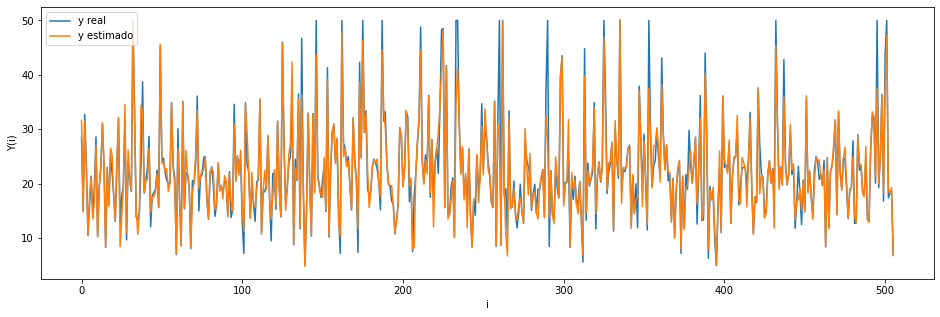

In [48]:
print("Esse é o resultado da aproximação usando os melhores valores de hiperparâmetros:\n")
comparison_plot(y_data,rnd_search.best_estimator_.predict(x_data))

# Grid Search

A busca em _Grid_ utiliza um vetor previamente determinado com valores para cada hiperparâmetro da nossa função, e calcula um _score_ para cada combinação, salvando sempre o melhor _score_ e a combinação de hiperparâmetros que leva a ele.

In [7]:
def f_root_mean_squared_error(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

In [8]:
def comparison_plot(y_true, y_pred):

    #Simple code to evalutate the prediction of X against y
    eixo_x=np.array(np.arange(0,y_true.size,1))

    fig, ax = plt.subplots(figsize=(16, 5))

    ax.plot(eixo_x, y_true, label='y real')
    ax.plot(eixo_x, y_pred, label='y estimado')
    ax.set_ylabel('Y(i)')
    ax.set_xlabel('i')
    ax.legend()

In [9]:
X=x_data
y=y_data

In [ ]:
print("Gerando os grids a serem percorridos")
C_grid=2**(np.linspace(-5,15,5))
print("C grid is: {}".format(C_grid))

gamma_grid=2**(np.linspace(-15,3,5))
print("Gamma grid is {}".format(gamma_grid))

epsilon_grid=(np.linspace(0.05,1,5))
print("Epsilon grid is {}".format(epsilon_grid))

In [11]:


# Using the Grid Seach
grid_search=GridSearchCV( SVR(kernel='rbf'), 
                          param_grid = { "C"      : C_grid, 
                                         "gamma"  : gamma_grid, 
                                         "epsilon": epsilon_grid}, 
                          scoring = 'neg_root_mean_squared_error')
grid_search.fit(X,y)
#print(grid_search)
                        

GridSearchCV(estimator=SVR(),
             param_grid={'C': array([3.1250e-02, 1.0000e+00, 3.2000e+01, 1.0240e+03, 3.2768e+04]),
                         'epsilon': array([0.05  , 0.2875, 0.525 , 0.7625, 1.    ]),
                         'gamma': array([3.05175781e-05, 6.90533966e-04, 1.56250000e-02, 3.53553391e-01,
       8.00000000e+00])},
             scoring='neg_root_mean_squared_error')

In [12]:
print("Os melhores valores de hiperparâmetros são: {}\nSeu RMSE é: {}".format(grid_search.best_params_, np.absolute(grid_search.best_score_)))

Os melhores valores de hiperparâmetros são: {'C': 32768.0, 'epsilon': 0.05, 'gamma': 3.0517578125e-05}
Seu RMSE é: 3.7825692902690755


Esse é o resultado da aproximação usando os melhores valores de hiperparâmetros:



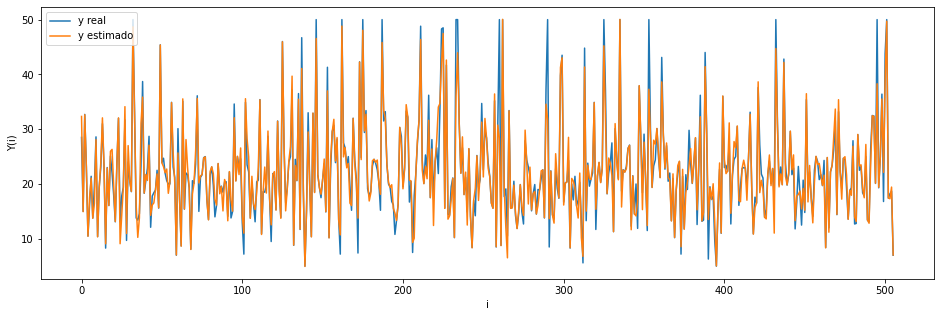

In [13]:
print("Esse é o resultado da aproximação usando os melhores valores de hiperparâmetros:\n")
comparison_plot(y,grid_search.best_estimator_.predict(X))


# Otimização Bayesiana



In [32]:
 !pip install scikit-optimize
 
 from skopt import BayesSearchCV
 from skopt.space import Real, Categorical, Integer

 
 bay_opt = BayesSearchCV(
    SVR(),
     {
         'C': Real(2**-5, 2**15, prior='log-uniform'),
         'gamma': Real(2**-15, 2**3, prior='log-uniform'),
         'epsilon': Real(0.05,1.0),
         'kernel': Categorical(['rbf']),
     },
     n_iter=125,
     cv = 5,
     optimizer_kwargs = {'base_estimator': 'RF'},
     scoring = 'neg_root_mean_squared_error'
      )
 
 bay_opt.fit(x_data, y_data)

BayesSearchCV(cv=5, estimator=SVR(), n_iter=125,
              optimizer_kwargs={'base_estimator': 'RF'},
              scoring='neg_root_mean_squared_error',
              search_spaces={'C': Real(low=0.03125, high=32768, prior='log-uniform', transform='identity'),
                             'epsilon': Real(low=0.05, high=1.0, prior='uniform', transform='identity'),
                             'gamma': Real(low=3.0517578125e-05, high=8, prior='log-uniform', transform='identity'),
                             'kernel': Categorical(categories=('rbf',), prior=None)})

In [33]:
print("C: ", bay_opt.best_params_['C'])
print("gamma: ", bay_opt.best_params_['gamma'])
print("epsilon: " ,  bay_opt.best_params_['epsilon'])
print("RMSE: ", -bay_opt.best_score_) 

C:  18474.611515901233
gamma:  3.134492390870761e-05
epsilon:  0.05248677111102097
RMSE:  3.726832530670445


Esse é o resultado da aproximação usando os melhores valores de hiperparâmetros:



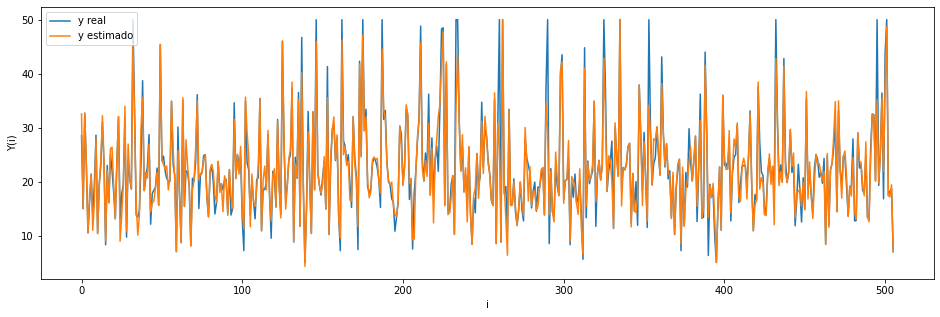

In [49]:
print("Esse é o resultado da aproximação usando os melhores valores de hiperparâmetros:\n")
comparison_plot(y_data,
SVR(kernel  = 'rbf',
    C       = bay_opt.best_params_['C'],
    gamma   = bay_opt.best_params_['gamma'], 
    epsilon = bay_opt.best_params_['epsilon']).fit(x_data,y_data).predict(x_data)
    )

# PSO

O _Particle Swarm Optimization_ é um algoritmo que usa a abstração de um enxame de partículas pra encontrar o ponto ótimo. Começamos com um número $N$ de partículas, cada uma com posição e velocidade aleatória. A próxima posição ($P_{i+1}$) de uma partícula é definida pela posição atual ($P_i$) somada à velocidade atual ($Vi$), como ilustrado pela equação abaixo:

$$ X_{i+1}​=X_i​+V_i $$

As partículas compartilham entre si o melhor ponto encontrado pelo grupo, e cada uma guarda a posição do melhor ponto encontrado pela própria partícula. Essas duas informações são utilizadas para decidir a próxima velocidade. A velocidade em cada dimensão ($d$) possui um componente de momento ($\omega$) que leva em consideração a direção atual, um componente cognitivo ($\phi_1$), que escala a distância entre a posição atual ($X_{i,d}$) e o melhor ponto encontrado pela partícula ($P_{i,d}$), e uma componente social ($\phi_2$) que escala a distância para a melhor posição global ($G_d$) encontrada até o momento, como ilustrado pela equação abaixo, onde $u_1$ e $u_2$ são números aleatórios entre 0 e 1:

$$ V_{i+1,d} = \omega \times V_{i,d} + \phi_1\times u_1 \times (P_{i,d}​−X{i,d}​)+\phi_2​\times u_2 ​\times(G_d​−X{i,d}​) $$

In [16]:
#Define the objective function to be optimized. A function that receives the hiper parameters and return the RMES
def hyperparameter_evalutation_function(x):
    
    log_C     = 20*x[0] - 5
    log_gamma = 18*x[1] - 15
    epsilon_  = x[2]


    C_     = 2**log_C
    gamma_ = 2**log_gamma
    
    reg=SVR(kernel  = 'rbf',
            C       = C_,
            gamma   = gamma_,
            epsilon = epsilon_)
    
    neg_root_mean_squared_errors = cross_val_score(reg, X, y, cv=5, scoring = 'neg_root_mean_squared_error')

    # Return the absolute value, since we're seeking to minimize the function value    
    return np.absolute(np.average(neg_root_mean_squared_errors))

In [17]:
def normalize_C(C_):
    return (np.log2(C_) + 5)/20
def unnormalize_C (C_):
    return 2**(20 * C_ - 5)

def normalize_gamma(gamma_):
    return (np.log2(gamma_) + 15)/18
def unnormalize_gamma(gamma_):
    return 2**(18 * gamma_ - 15)


In [19]:
# Optimizing the function using PSO:
#                        C,    gamma  epsilon
pso_lower_boundaries = [0.0,   0.0,    0.05]
pso_upper_boundaries = [1.0,   1.0,    1.0]

pso_best_x, pso_best_averaged_rmes = pso(func      = hyperparameter_evalutation_function,
                                         lb        = pso_lower_boundaries, 
                                         ub        = pso_upper_boundaries,
                                         swarmsize = 11,
                                         maxiter   = 11)

print("Os melhores valores de hiperparâmtros são:\nC      : {}\ngamma  : {}\nepsilon: {}\nRMES   : {}".format(unnormalize_C(pso_best_x[0]), 
                                                                                                              unnormalize_gamma(pso_best_x[1]), 
                                                                                                              pso_best_x[2], 
                                                                                                              pso_best_averaged_rmes))



Stopping search: maximum iterations reached --> 11
Os melhores valores de hiperparâmtros são:
C      : 11343.06178386297
gamma  : 3.0517578125e-05
epsilon: 0.7704801465483817
RMES   : 3.803661205384974


Esse é o resultado da aproximação usando os melhores valores de hiperparâmetros:



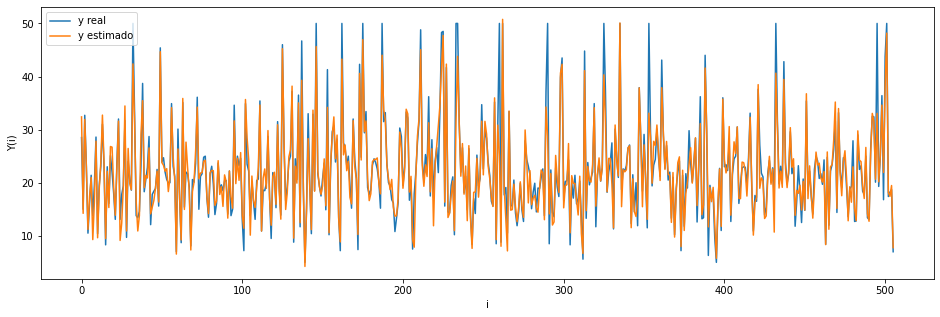

In [21]:
print("Esse é o resultado da aproximação usando os melhores valores de hiperparâmetros:\n")
comparison_plot(y,
SVR(kernel  = 'rbf',
    C       = unnormalize_C(pso_best_x[0]),
    gamma   = unnormalize_gamma(pso_best_x[1]), 
    epsilon = pso_best_x[2]).fit(X,y).predict(X)
    )

Observa-se que o desempenho do algoritmo e otimização foi próximo ao $Grid Search$ e Otimização Bayesiana.

# Simulated Annealing

O método _Simulated Annealing_ se baseia no funcionamento de uma têmpera. A partir de uma posição inicial na função, um novo ponto é gerado, e o valor da função desse ponto é comparado com o ponto inicial. Se a função diminuiu, o novo ponto passa a ser o valor ótimo atual. Se a função aumentou, a probabilidade de que este novo ponto vire o ponto atual é dado pela equação abaixo: 

$$ P=e^{(f(y)−f(x))/T} $$

Onde $T$ é uma variável temperatura que decrementa a medida que as iterações avançam. $T$ deve começar um valor alto (cerca de 98% no algoritmo utilizado), dessa forma $P \approx e^0=1$ no início do algoritmo, o que aumenta a exploração do algoritmo no espaço de estados possíveis. A medida que o tempo passa, T decrementa, diminuindo a probabilidade de que um novo ponto seja aceito, até que o algoritmo estabiliza e o último estado é retornado.

In [22]:
! pip install simanneal  # from pypi

In [24]:
# Create the class that inherits from Annealer
import simanneal
from simanneal import Annealer

class SvmRegressorSimulatedAnnealing(Annealer):
    """Simulated Annealing optimization for SVM Regressor hyperparameters finding."""
        
    # pass extra data into the constructor
    def __init__(self, state, objective_function, step_range):
        self.objective_function = hyperparameter_evalutation_function
        self.step_range         = step_range
        super(SvmRegressorSimulatedAnnealing, self).__init__(state)
    
    def energy(self):
        """Calculate the RMES of current hyperparameters."""
        e = self.objective_function(self.state)
        return e

    def increase_and_check_boundaries(self, current_state):
        """Increase state using step_range and check boundaries"""
        next_state = current_state + random.uniform(self.step_range[0], self.step_range[1])
        
        if(next_state < 0.0):
            return 0.0
        elif (next_state > 1.0):
            return 1.0
        else: 
            return next_state

    def move(self):
        """Calculate next hyperparameter values"""
        for i in range(3):
            self.state[i] = self.increase_and_check_boundaries(self.state[i])
        

In [25]:
import math

# Defining the maximum temperature
# Generate random points and get the average difference between them
output_list = []
for i in range(300):
    output_list.append(hyperparameter_evalutation_function([random.uniform(0,1), random.uniform(0,1), random.uniform(0,1),]))
np_output_list=np.array(output_list)

np_function_diferences = np_output_list-np.average(np_output_list)

np_average_difference  = np.average(np.abs(np_function_diferences))
sa_maximum_temperature = -np_average_difference/math.log(0.98)
print("Tmax is {}".format(sa_maximum_temperature))

Tmax is 67.70449117559632


In [26]:
# Run the simualted annealing algorithm
sa_initial_state = [0.5, 0.5, 0.5]
sa_step_range    = [-0.02, 0.02]

sa_svm_regressor = SvmRegressorSimulatedAnnealing(sa_initial_state, hyperparameter_evalutation_function, sa_step_range)

sa_svm_regressor.steps = 125
sa_svm_regressor.updates=10
sa_svm_regressor.Tmax  = sa_maximum_temperature
sa_svm_regressor.Tmin  = 0.001

# Run it!
sa_best_hyperparams, sa_best_rmes = sa_svm_regressor.anneal()

print("\nOs melhores valores de hiperparâmtros são:\nC      : {}\ngamma  : {}\nepsilon: {}\nRMES   : {}".format(unnormalize_C(sa_best_hyperparams[0]), 
                                                                                                              unnormalize_gamma(sa_best_hyperparams[1]), 
                                                                                                              sa_best_hyperparams[2], 
                                                                                                              sa_best_rmes))


 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     0.00100          5.12    50.00%    50.00%     0:00:12     0:00:00
Os melhores valores de hiperparâmtros são:
C      : 100.87458010328083
gamma  : 0.0009254917155695545
epsilon: 0.27131046489918087
RMES   : 5.118055256798565


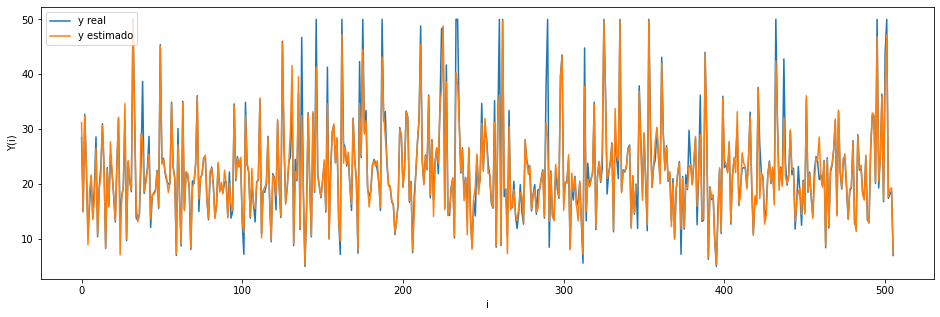

In [27]:
comparison_plot(y,
SVR(kernel  = 'rbf',
    C       = unnormalize_C(sa_best_hyperparams[0]),
    gamma   = unnormalize_gamma(sa_best_hyperparams[1]), 
    epsilon = sa_best_hyperparams[2]).fit(X,y).predict(X)
    )

Utilizando os hiperparâmetros recomendados pelo enunciado, o desempenho do algoritmo de Têmpera Simulada foi inferior aos anteriores.

É possível observar que a taxa de aceite ainda estava muito alta quando o algoritmo parou, o que indica que com mais rodadas se poderia chegar em melhores resultados. Fazendo uma nova rodada com passo maior (0,04 em vez de 0,02) e mais iterações (400 em vez de 125), obtem-se um resultado próximo ao obtido pelos algoritmos anteriores, $\approx$ 3,7.

In [28]:
# Run the simualted annealing algorithm
sa2_initial_state = [0.5, 0.5, 0.5]
sa2_step_range    = [-0.04, 0.04]
sa2_svm_regressor = SvmRegressorSimulatedAnnealing(sa2_initial_state, hyperparameter_evalutation_function, sa2_step_range)
sa2_svm_regressor.steps = 400
sa2_svm_regressor.updates=10
sa2_svm_regressor.Tmax  = sa_maximum_temperature
sa2_svm_regressor.Tmin  = 0.001

# Run it!
sa2_best_hyperparams, sa2_best_rmes = sa2_svm_regressor.anneal()

print("\nOs melhores valores de hiperparâmtros são:\nC      : {}\ngamma  : {}\nepsilon: {}\nRMES   : {}".format(unnormalize_C(sa2_best_hyperparams[0]), 
                                                                                                              unnormalize_gamma(sa2_best_hyperparams[1]), 
                                                                                                              sa2_best_hyperparams[2], 
                                                                                                              sa2_best_rmes))


 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     0.00100          3.72     2.50%     2.50%     0:10:33     0:00:00
Os melhores valores de hiperparâmtros são:
C      : 20091.457497017036
gamma  : 3.0517578125e-05
epsilon: 0.15251365906196152
RMES   : 3.7202709439814505


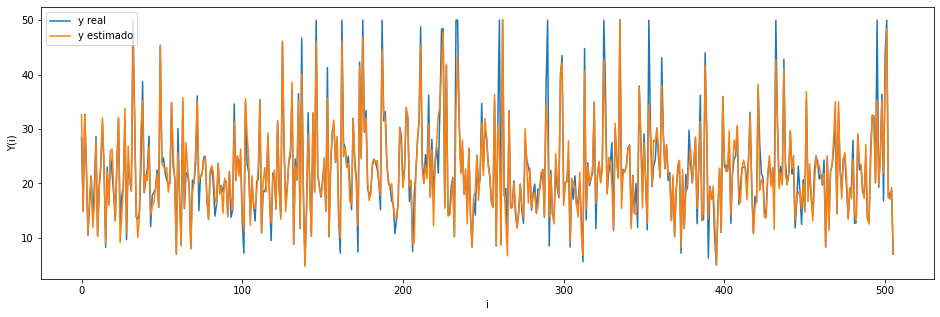

In [29]:
comparison_plot(y,
SVR(kernel  = 'rbf',
    C       = unnormalize_C(sa2_best_hyperparams[0]),
    gamma   = unnormalize_gamma(sa2_best_hyperparams[1]), 
    epsilon = sa2_best_hyperparams[2]).fit(X,y).predict(X)
    )

# CMA-ES

In [45]:
!pip install cma
from sklearn.model_selection import cross_val_score
import cma

def loss(xs, X_data, y_data):  
  C_arg = 2**(xs[0]*20 - 5)
  gamma_arg = 2**(xs[1]*18 - 15)
  epsilon_arg = xs[2] + 0.05
  
  svr = SVR(kernel="rbf", C=C_arg, epsilon=epsilon_arg , gamma=gamma_arg)
  scores = cross_val_score(svr, X_data, y_data, cv=5, scoring = 'neg_root_mean_squared_error')

  return -scores.mean()

x0 = np.random.uniform(0,1,3)

es = cma.CMAEvolutionStrategy(
    x0=x0,
    sigma0=0.25,
    inopts={'bounds': [0, 1]},
)

es.opts.set({'maxfevals': 125})

while not es.stop():
  solutions = es.ask()
  es.tell(solutions, [loss(sol,x_data , y_data) for sol in solutions])
  es.logger.add()
  es.disp()


(3_w,7)-aCMA-ES (mu_w=2.3,w_1=58%) in dimension 3 (seed=128390, Mon May  3 22:28:16 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      7 5.235624225576066e+00 1.0e+00 2.79e-01  2e-01  3e-01 0:00.5
    2     14 3.998144616373202e+00 1.6e+00 3.28e-01  3e-01  5e-01 0:02.3
    3     21 3.830017599368035e+00 2.3e+00 3.68e-01  3e-01  6e-01 0:06.7
    4     28 4.049687277572281e+00 2.7e+00 3.54e-01  3e-01  5e-01 0:13.4
    5     35 4.146310155421839e+00 3.0e+00 3.87e-01  3e-01  5e-01 0:25.4
    6     42 3.779549610947512e+00 3.2e+00 3.82e-01  3e-01  5e-01 0:41.7
    7     49 3.790500825594722e+00 3.3e+00 3.87e-01  3e-01  5e-01 0:55.5
    8     56 4.198320681058261e+00 3.3e+00 4.13e-01  2e-01  5e-01 1:07.8
    9     63 4.001783387295998e+00 3.5e+00 3.72e-01  2e-01  5e-01 1:32.7
   10     70 3.919702458499084e+00 3.7e+00 3.48e-01  2e-01  5e-01 2:06.4
   11     77 3.824687302849740e+00 4.3e+00 3.12e-01  1e-01  4e-01 2:31.2
   12     84 3.792732860005648e+00 

In [46]:
C = 2**(es.result.xbest[0]*20 - 5)
gamma = 2**(es.result.xbest[1]*18 - 15)
epsilon = es.result.xbest[2] + 0.05

print("C: ", C)
print("gamma: ", gamma)
print("epsilon: " , epsilon)
print("RMSE: ", es.result.fbest) 

C:  19616.841432577316
gamma:  3.117140203089185e-05
epsilon:  0.1166694487495942
RMSE:  3.7249222218567395


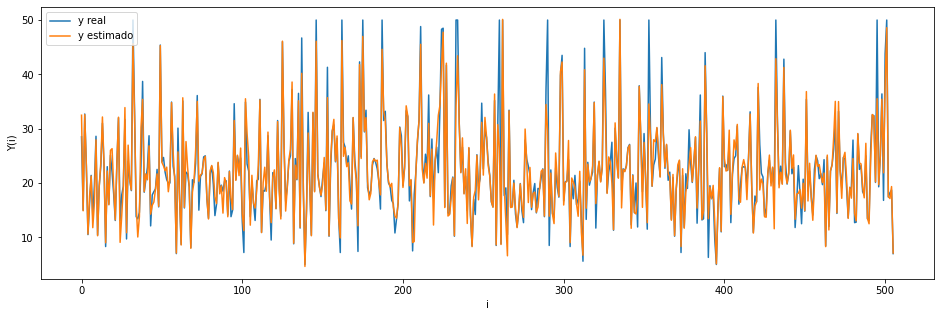

In [47]:
comparison_plot(y,
SVR(kernel  = 'rbf',
    C       = C,
    gamma   = gamma, 
    epsilon = epsilon).fit(x_data,y_data).predict(x_data)
    )